In [5]:
import pandas as pd
import sklearn.preprocessing as prep
import sklearn.metrics as met
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dogs.csv')
features = df.columns[1:]

df.set_index('breed', inplace = True)
x_orig = df[features]


scaler = prep.MinMaxScaler().fit(df)
x = pd.DataFrame(scaler.transform(x_orig), columns = features)
x.index = df.index


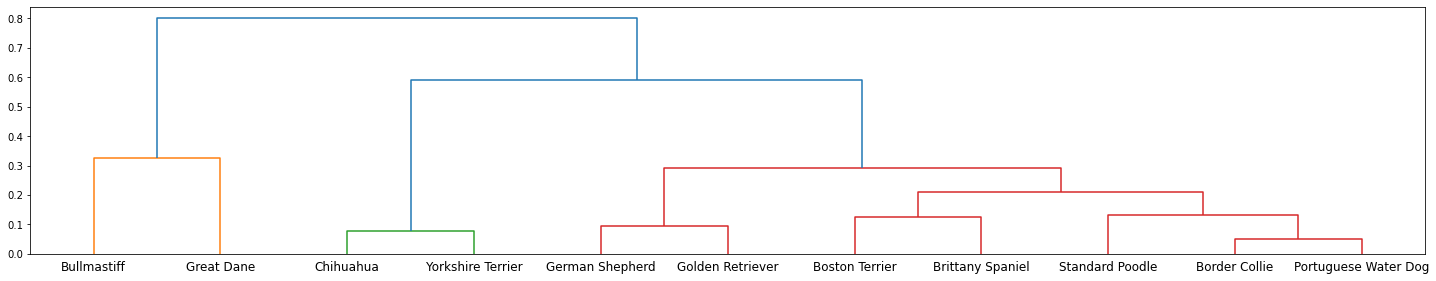

In [6]:
Z = linkage(x, 'average')

#Z je matrica spajanja pri klasterovanju

fig = plt.figure(figsize=(25,10))
fig.add_subplot(2,1,1)

dn = dendrogram(Z,labels=x.index)

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


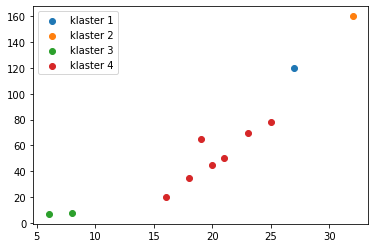

In [12]:
#Odredjivanje kom klasteru pripada svaka instanca u skupu.
#Kao prag za rastojanje pri spajanju klastera postavlja se vrednost 0.3,
# tj. prekida se spajanje klastera cije je rastojanje iznad 0.3.

fig.add_subplot(2,1,2)
df['label'] = fcluster(Z, t=0.3, criterion='distance')

for i in range(1, max(df['label']+1)):
    cluster = df.loc[df['label']==i]
    plt.scatter(cluster['height'], cluster['weight'], label = 'klaster %d'%i)
    
plt.legend()    
plt.show()

[[ 0.          8.          0.05047034  2.        ]
 [ 4.         10.          0.07720025  2.        ]
 [ 5.          6.          0.09301156  2.        ]
 [ 1.          2.          0.1246148   2.        ]
 [ 9.         11.          0.1304373   3.        ]
 [14.         15.          0.21119649  5.        ]
 [13.         16.          0.29077603  7.        ]
 [ 3.          7.          0.32454896  2.        ]
 [12.         17.          0.59213162  9.        ]
 [18.         19.          0.80001992 11.        ]]


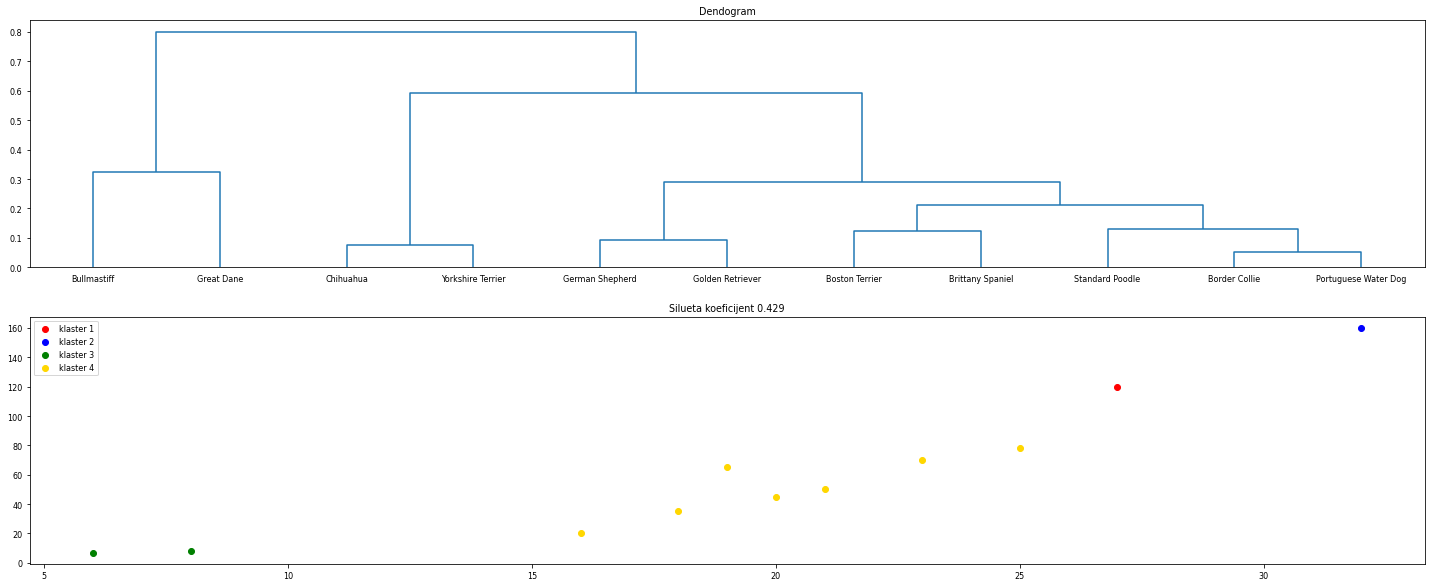

In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib

#ucitavanje skupa
df = pd.read_csv('dogs.csv')

# Za klasterovanje ce se koristiti atributi visina i tezina psa,
# a rasa nece biti uzeta u obzir.
features = df.columns[1:]

#vrednost atributa breed (tj. rasa) postaje oznaka (indeks) instance
df.set_index('breed', inplace=True)

#normalizacija vrednosti atributa
scaler = MinMaxScaler().fit(df)
x = pd.DataFrame(scaler.transform(df[features]))
x.columns = features
x.index=df.index

#postavljanje parametara za sliku
matplotlib.rcParams['font.size']=8

#Primena hijerarhijskg sakupljajuceg klasterovanja koriscenjem euklidskog rastojanja
# i 'average' veze pri odredjivanju bliskosti dva klastera.
#Rezultat je matrica spajanja pri klasterovanju.
Z = linkage(x, 'average')
print(Z)

# pravljenje slike sa graficima
fig = plt.figure(figsize=(25, 10))

# Podela slike na 2x1 celije. U prvoj celiji se crta dendogram.
fig.add_subplot(2,1,1)

#prikaz izvrsenog hijerarhijskog klasterovanja pomocu dendograma
dn = dendrogram(Z, labels= x.index, leaf_font_size=8, color_threshold=0, distance_sort=True )
plt.title('Dendogram')

# Definisanje boja koje se koriste pri crtanju instanci klastera.
# Instance jednog klastera ce biti prikazane istom bojom.
colors = ['red', 'blue', 'green', 'gold', 'm', 'black', 'brown']

# U drugoj celiji na slici prikazuju se instance klastera pomocu seme sa
# rasprsenim elementima.
fig.add_subplot(2,1,2)

#Odredjivanje kom klasteru pripada svaka instanca u skupu.
#Kao prag za rastojanje pri spajanju klastera postavlja se vrednost 0.3,
# tj. prekida se spajanje klastera cije je rastojanje iznad 0.3.
df['label'] = fcluster(Z, t=0.3, criterion='distance')
#Napomena: Nakon promene parametra color_threshold=0.3 u funkciji dendrogram
# plavom bojom se prikazuju spajanja klastera koja se ne izvrsavaju. Razlicitim
# bojama se prikazuju instance klastera koji ce biti izdvojeni. Oznake klastera su
#u intervalu [1,k], gde je k ukupan broj klastera.

for i in range(1, max(df['label'])+1):
    # izdvajanje instanci klastera koji se obradjuje
    cluster = df.loc[df['label']==i]

    # crtanje instanci klastera pomocu seme sa rasprsenim elementima
    plt.scatter(cluster['height'], cluster['weight'], color=colors[i-1], label='klaster %d' %i)

# postavljanje legende i naslova za drugu celiju
plt.title('Silueta koeficijent %0.3f' % silhouette_score(x, df['label']))
plt.legend()

#prikaz slike
plt.show()

#Komentar: izdvojena su tri klastera kojima su grupisani psi malog, srednjeg i velikog rasta.

#Na dendogramu se jasno vidi da postoje 3 dobro odvojena klastera, tj. da ne treba izvrsiti
# poslednja 2 spajanja klastera, sto se i postize sa zadatim pragom za rastojanje od 0.3.

